In [1]:
import xlrd
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
def laporan_presensi_per_mk(lokasi_berkas):
    wb = xlrd.open_workbook(lokasi_berkas)
    sheet = wb.sheet_by_index(0)
    
    list_pengajar = []
    for nomor_baris in range(sheet.nrows):
        if sheet.cell_value(nomor_baris, 0) == 'Summary Pengajar':
            for nomor_baris_pengajar in range(nomor_baris+3, sheet.nrows):
                if sheet.cell(nomor_baris_pengajar, 0).value == '':
                    break
                list_pengajar.append(sheet.row_values(nomor_baris_pengajar, 0)[1:2] +
                                     sheet.row_values(nomor_baris_pengajar, 0)[0:1])
    
    list_presensi = [] 
    for nomor_baris in range(sheet.nrows):
        if sheet.cell_value(nomor_baris, 0) == 'Nama Mahasiswa':
            for nomor_baris_mahasiswa in range(nomor_baris, sheet.nrows):
                list_presensi.append(sheet.row_values(nomor_baris_mahasiswa, 0)[0:2] +
                                     sheet.row_values(nomor_baris_mahasiswa, 0)[5:])
            break
    nama_kolom = list_presensi.pop(0)
    df_presensi = pd.DataFrame(list_presensi, columns=nama_kolom)
    
    x = df_presensi. iloc[:, 0].tolist()
    y = df_presensi.apply(lambda row: sum(row[0:]=='O') ,axis=1).tolist()
    
    x_pos = [i for i, _ in enumerate(x)]
    
    # bagian ini akan dibuat dinamis
    maks_kehadiran = 13
    
    plt.figure(figsize=(8, 4), dpi= 500, facecolor='w', edgecolor='k')
    plt.bar(x_pos, y, color=(0.2, 0.4, 0.6, 0.6))
    plt.xlabel('Nama Mahasiswa')
    plt.ylabel('Jumlah Kehadiran')
    plt.title(sheet.cell_value(0, 0))
    
    plt.figtext(0, -0.3, sheet.cell_value(2, 0), wrap=True)
    for indeks, nilai in enumerate(list_pengajar):
        plt.figtext(0, -0.35-(indeks*0.05),
                    'Pengajar ' + str(indeks + 1) + ': ' + nilai[1] + ' (' + str(nilai[0]) + ')', wrap=True)
        
        if indeks == len(list_pengajar)-1:
            plt.figtext(0, -0.4-(indeks*0.05), 
                        str('Rata-rata kehadiran: ' + 
                            "%.2f" % (sum([(element / maks_kehadiran) for element in y]) / len(y) * 100)) + '%', 
                        wrap=True)
            plt.figtext(0, -0.45-(indeks*0.05), 
                        str('Kehadiran minimum: ' + 
                            "%.2f" % (min([(element / maks_kehadiran) for element in y]) * 100)) + '%', 
                        wrap=True)
            plt.figtext(0, -0.5-(indeks*0.05), 
                        str('Kehadiran maksimum: ' + 
                            "%.2f" % (max([(element / maks_kehadiran) for element in y]) * 100)) + '%', 
                        wrap=True)
    
    plt.xticks(x_pos, x, rotation='vertical')
    
    plt.show()

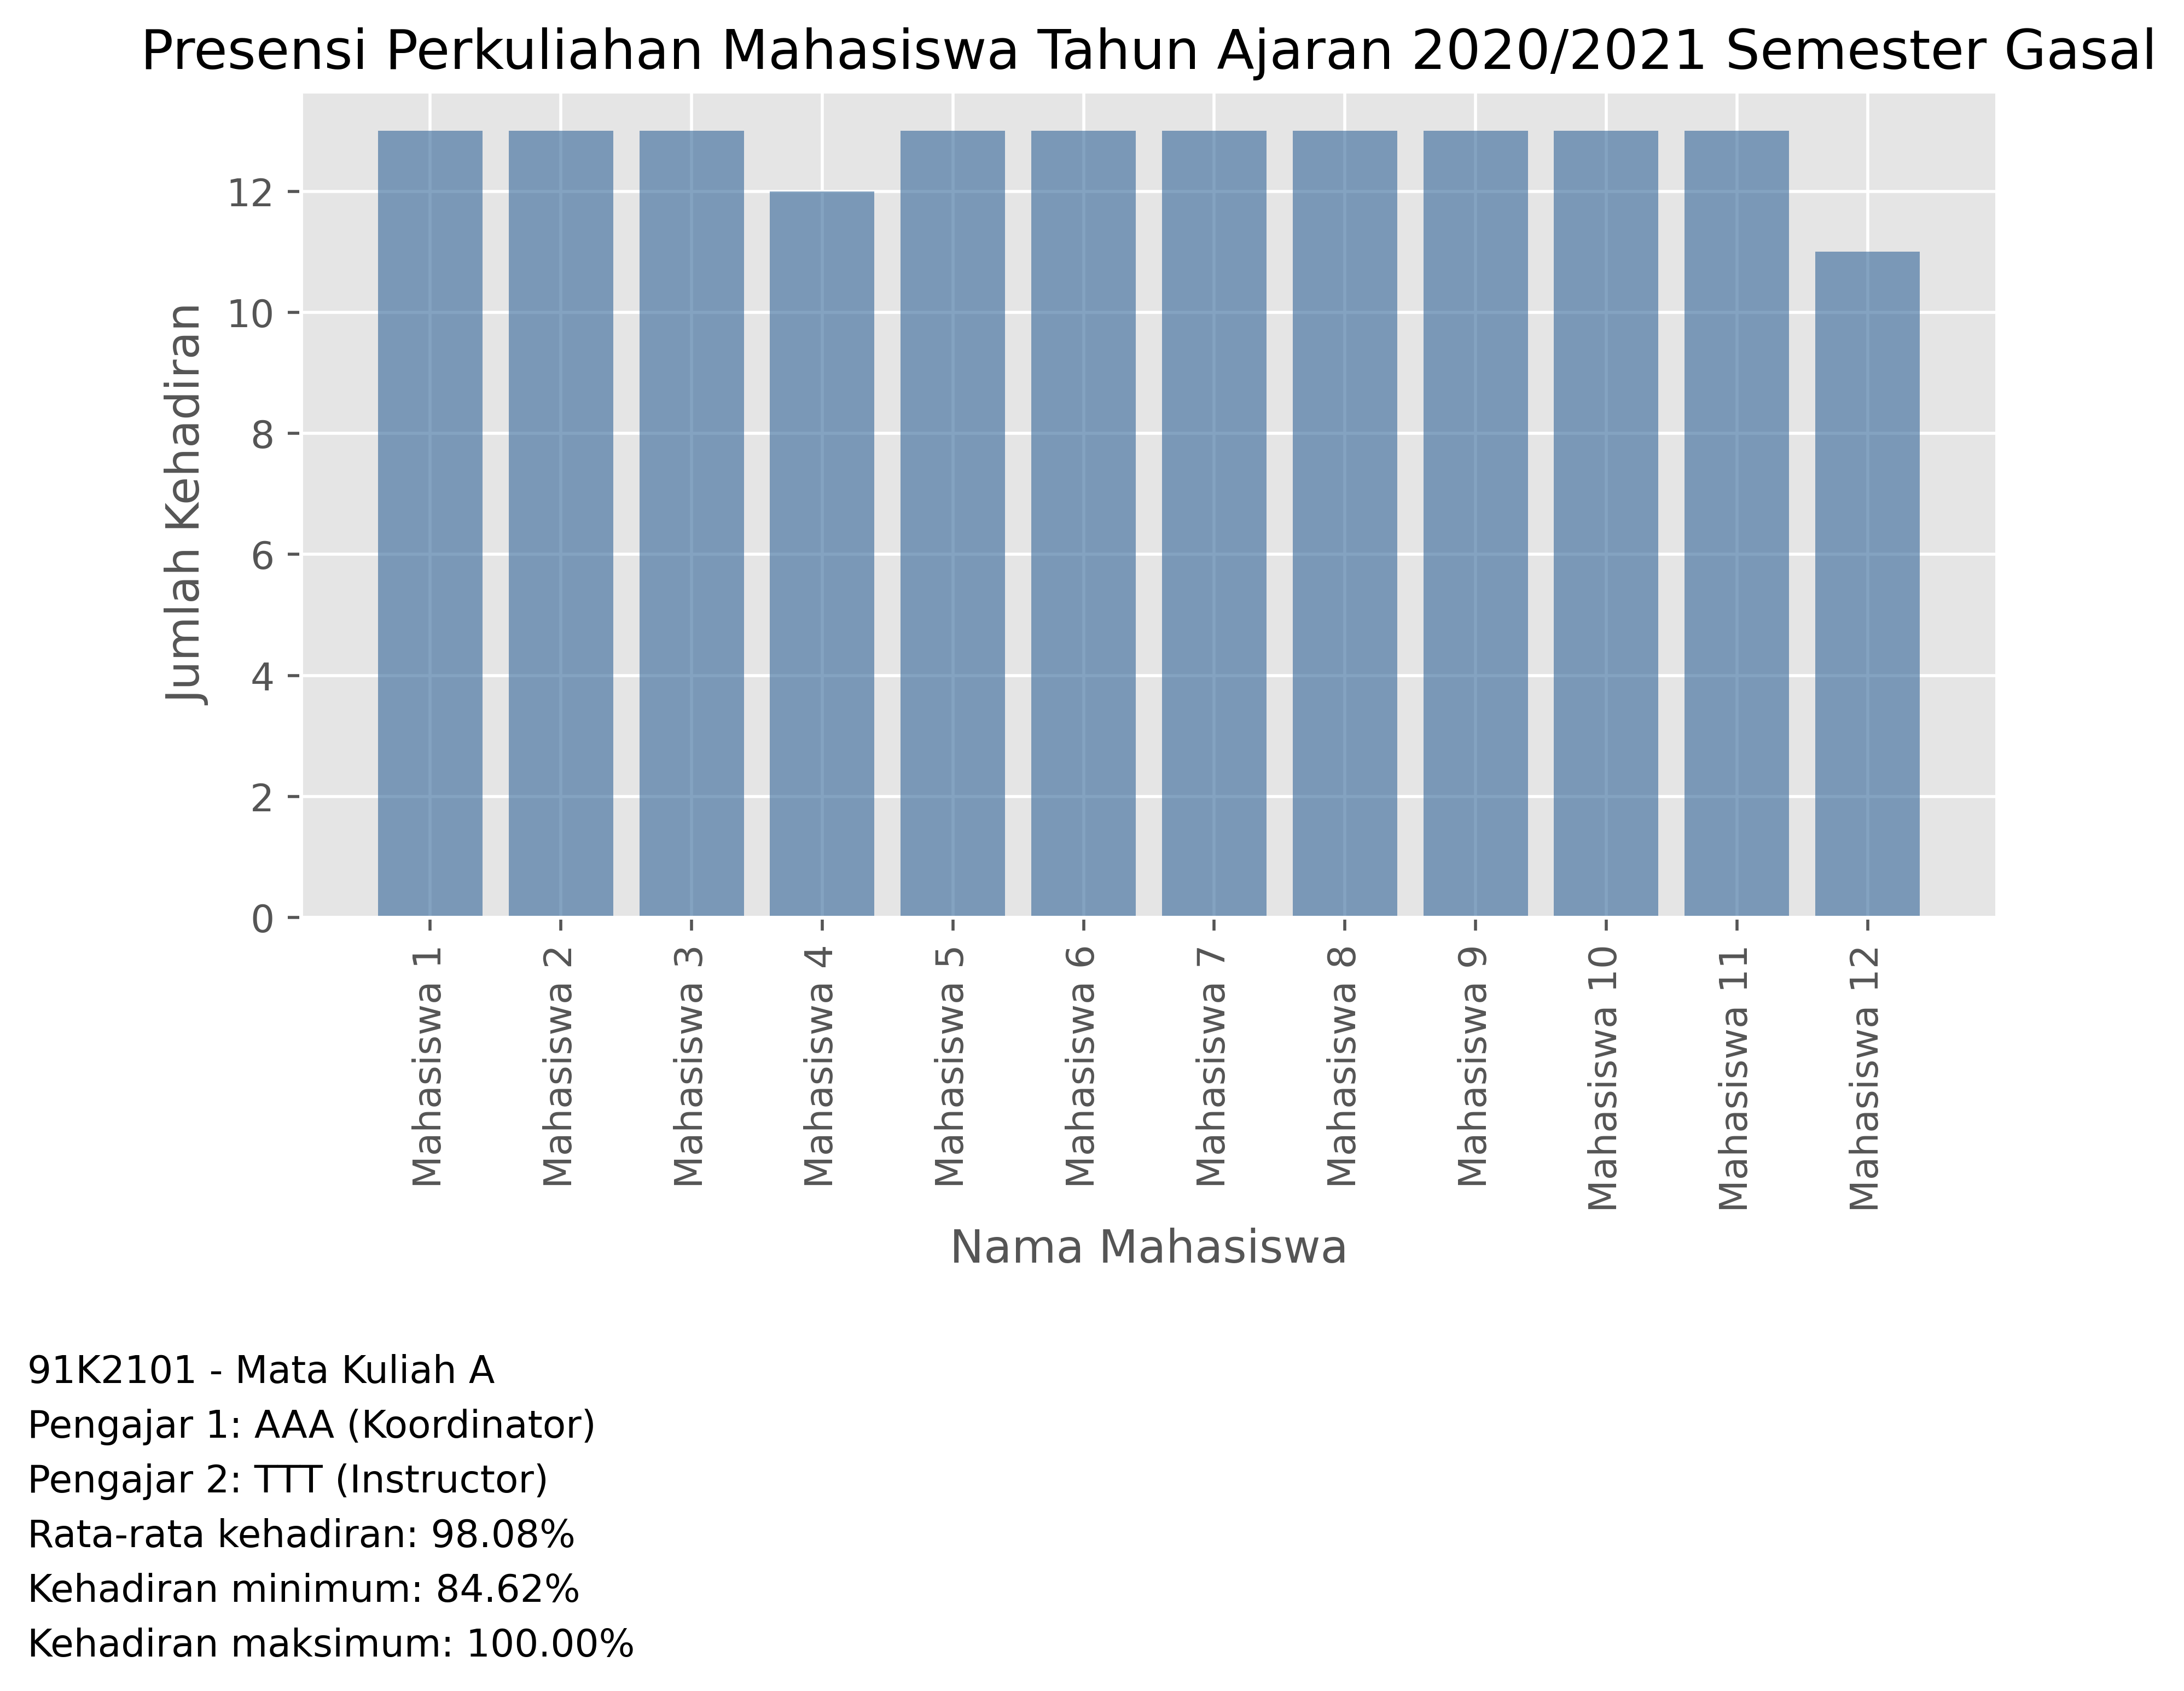

In [3]:
laporan_presensi_per_mk('data/sampel-presensi.xlsx')